**Exercise 14.11**. Consider the monthly milk production time series used in Exhibit 14.24 on page 374. The data are in the file named `milk`.

**(a)** Estimate the spectrum using a spectral window that is a convolution of two modified Daniell windows each with *span* $= 7$. Compare these results with those shown in Exhibit 14.24.

**(b)** Estimate the spectrum using a single modified Daniell spectral window with *span* $= 7$. Compare these results with those shown in Exhibit 14.24 and those in part (a).

**(c)** Finally, estimate the spectrum using a single modified Daniell spectral window with span = 11. Compare these results with those shown in Exhibit 14.24 and those in parts (a) and (b).

**(d)** Among the four different estimates considered here, which do you prefer and why?

**Solution**.

In [1]:
require(data.table)
require(ggplot2)

Loading required package: data.table

Loading required package: ggplot2



In [2]:
source('periodogram.R')

In [3]:
data = fread('../data/milk.dat')
Y = data[['milk']]

**(a)**

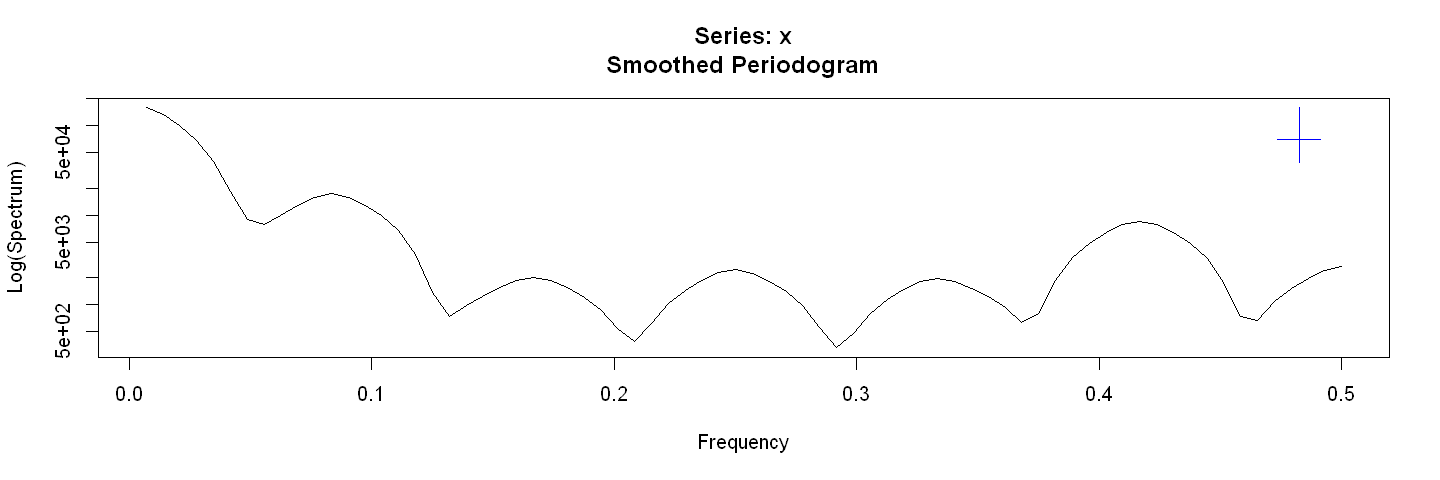

In [4]:
options(repr.plot.width=12, repr.plot.height=4)

s = spec(Y, spans=c(7, 7), taper=.1,  sub='', xlab='Frequency', ylab='Log(Spectrum)')

Compared with Exhibit 14.24, the bandwidth is bigger and the peaks are wider, but the peak frequencies are still the same.

**(b)**

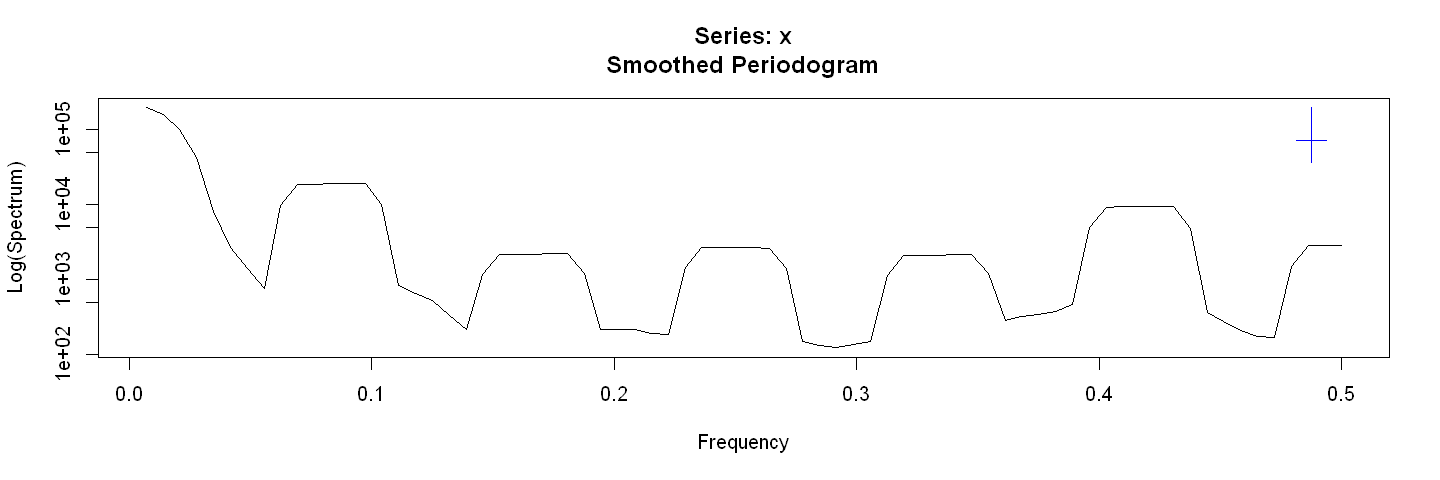

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

s = spec(Y, spans=c(7), taper=.1,  sub='', xlab='Frequency', ylab='Log(Spectrum)')

Similar results, but the effects of the kernel window are much more noticeable as flat peak tops.

**(c)**

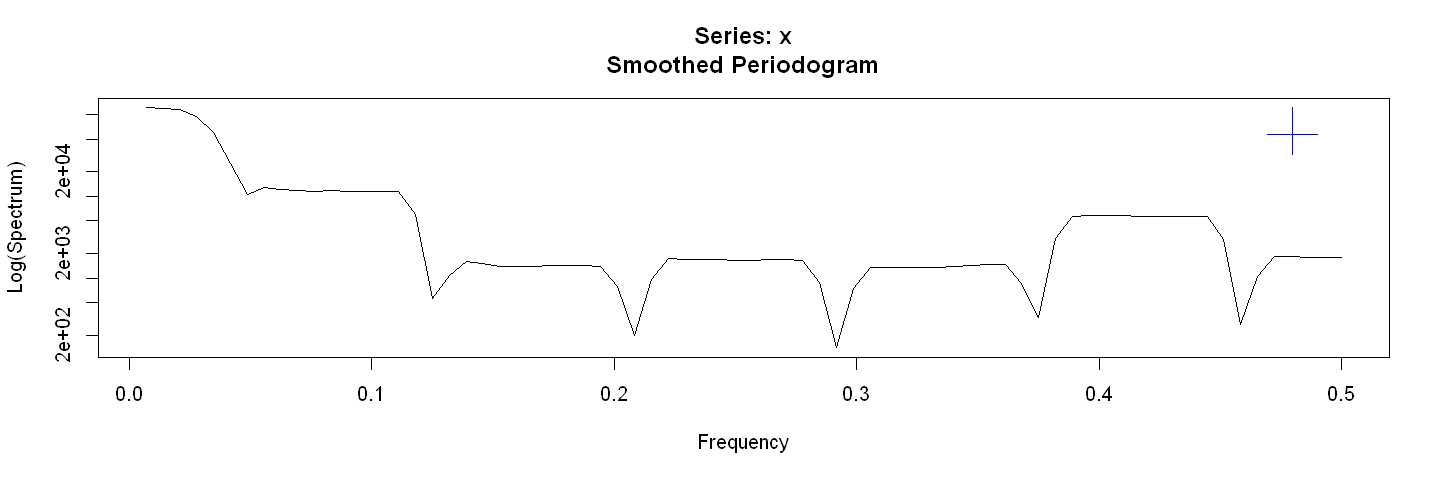

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

s = spec(Y, spans=c(11), taper=.1,  sub='', xlab='Frequency', ylab='Log(Spectrum)')

Peaks are yet wider.

**(d)** The estimate in Exhibit 14.24 seems preferable, as it suffers less from the kernel window smoothing around the peaks, while still not including too noisy of a spectrum.

**Exercise 14.12**. Consider the river flow series displayed in Exhibit 14.22 on page 372. An estimate of the spectrum is shown in Exhibit 14.23 on page 373. The data are in the file named `flow`.

**(a)** Here $n = 576$ and $\sqrt{n} = 24$. Estimate the spectrum using *span* $= 25$ with the modified Daniell spectral window. Compare your results with those shown in Exhibit 14.23.

**(b)** Estimate the spectrum using *span* $= 13$ with the modified Daniell spectral window and compare your results to those obtained in part (a) and in Exhibit 14.23.

**Solution**.

In [7]:
Y = log(fread('../data/flow.dat'))

**(a)**

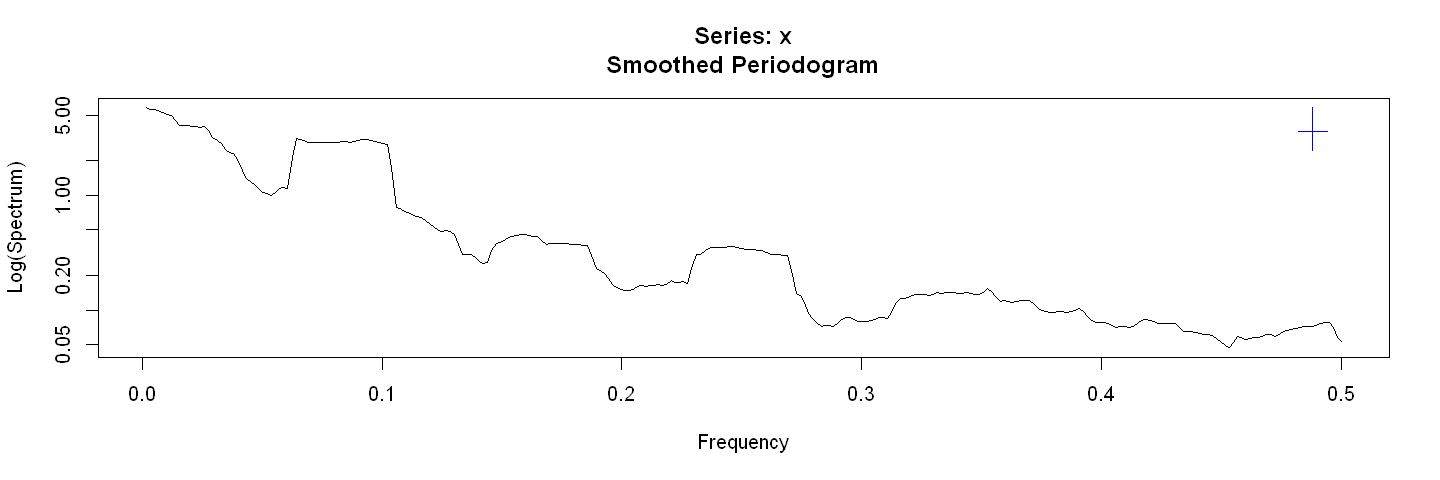

In [8]:
options(repr.plot.width=12, repr.plot.height=4)

s = spec(Y, spans=c(25), taper=.1,  sub='', xlab='Frequency', ylab='Log(Spectrum)')

The peaks are considerably wider.

**(b)**

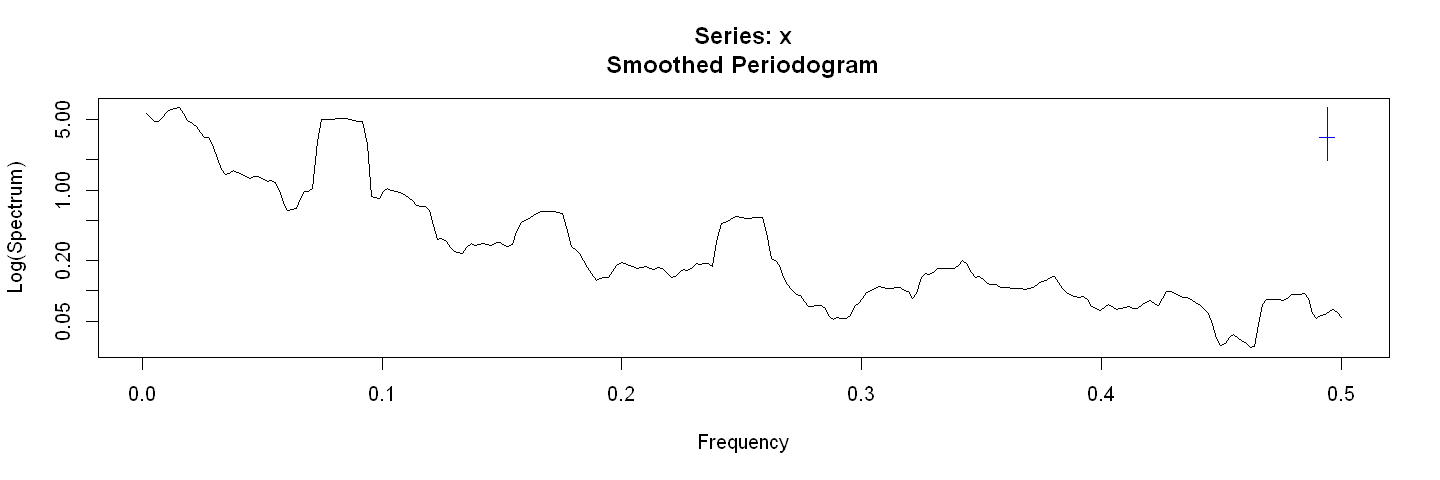

In [9]:
options(repr.plot.width=12, repr.plot.height=4)

s = spec(Y, spans=c(13), taper=.1,  sub='', xlab='Frequency', ylab='Log(Spectrum)')

The peaks are still too wide, but less so.

**Exercise 14.13**.  The time series in the file named `tuba` contains about 0.4 seconds of digitized sound from a tuba playing a B flat one octave and one note below middle C.

**(a)** Display a time series plot of the first 400 of these data and compare your results with those shown in Exhibit 14.25 on page 375, for the trombone and euphonium.

**(b)** Estimate the spectrum of the tuba time series using a convolution of two modified Daniell spectral windows, each with *span* $= 11$.

**(c)** Compare the estimated spectrum obtained in part (b) with those of the trombone and euphonium shown in Exhibit 14.26 on page 376. (You may want to overlay several of these spectra.) Remember that the tuba is playing one octave lower than the two other instruments.

**(d)** Do the higher-frequency components of the spectrum for the tuba look more like those of the trombone or those of the euphonium? (Hint: The euphonium is sometimes called a tenor tuba!)

**Solution**.

In [10]:
Y_tuba = fread('../data/tuba.dat')[['tuba']]
Y_tbone = fread('../data/tbone.dat')[['tbone']]
Y_euph = fread('../data/euph.dat')[['euph']]

**(a)**

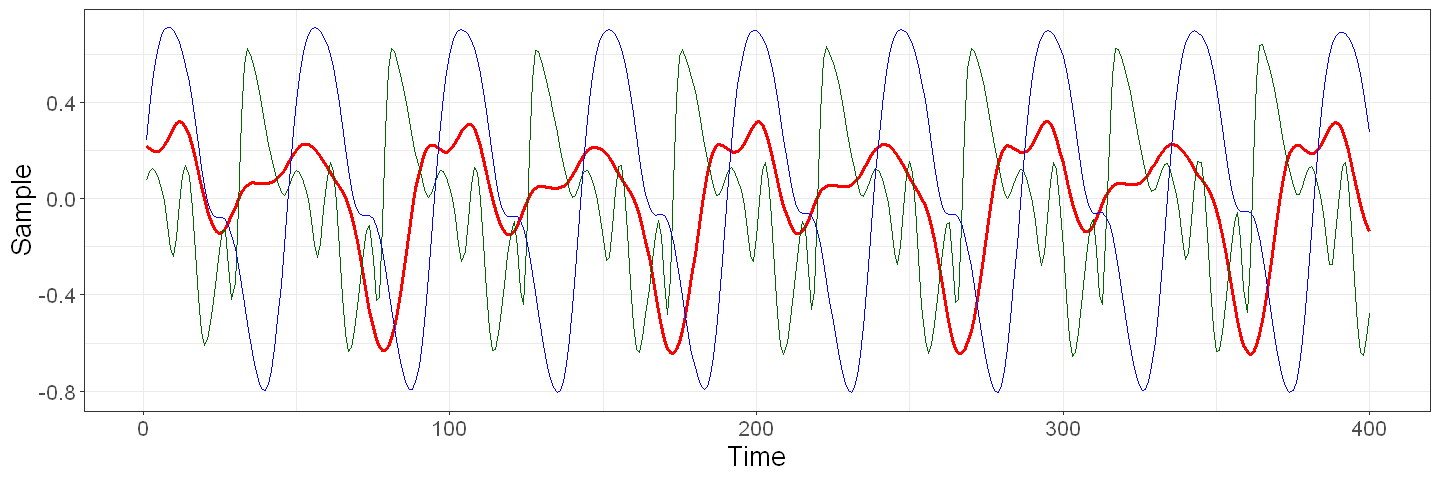

In [11]:
ggplot() +
    geom_line(aes(x=1:400, y=Y_tuba[1:400]), color='red', size=1) +
    geom_line(aes(x=1:400, y=Y_tbone[1:400]), color='darkgreen') +
    geom_line(aes(x=1:400, y=Y_euph[1:400]), color='blue') +
    xlab('Time') + ylab('Sample') +
    theme_bw() + theme(text = element_text(size=16))

The tuba waveform seems to be in between the Trombone and the Euphonium in terms of high frequency elements / spiky-ness.  The waveform is also twice as long in samples, as it represents a sound one octave lower.

Let's subsample the tuba waveform and plot it again:

In [12]:
Y_tuba_subsampled = Y_tuba[c(T, F)]

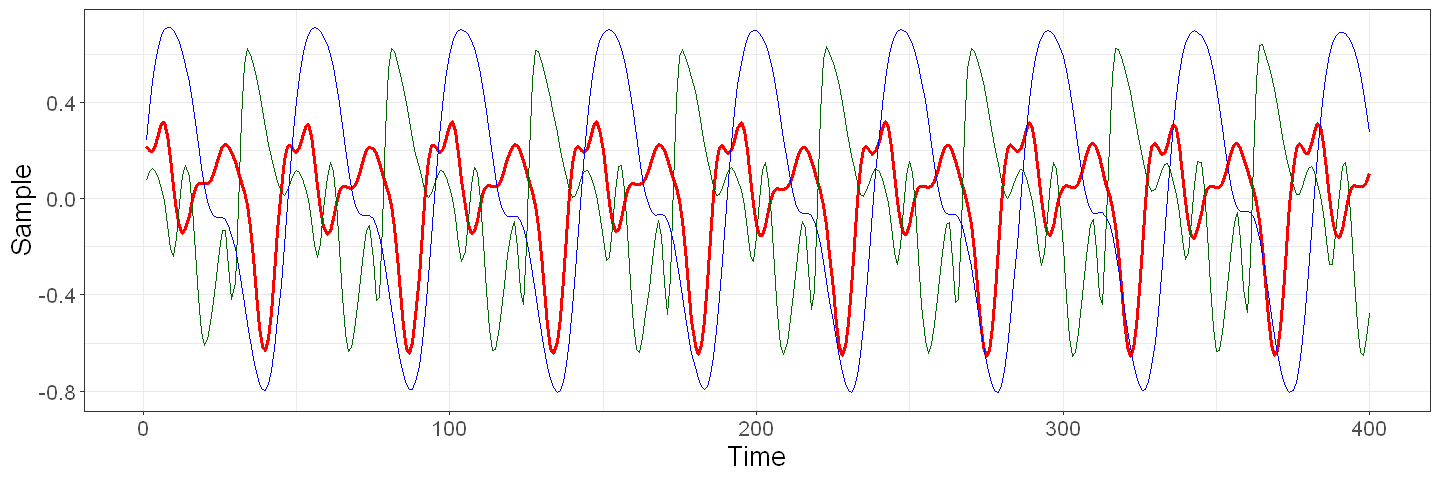

In [13]:
ggplot() +
    geom_line(aes(x=1:400, y=Y_tuba_subsampled[1:400]), color='red', size=1) +
    geom_line(aes(x=1:400, y=Y_tbone[1:400]), color='darkgreen') +
    geom_line(aes(x=1:400, y=Y_euph[1:400]), color='blue') +
    xlab('Time') + ylab('Sample') +
    theme_bw() + theme(text = element_text(size=16))

**(b)**

In [14]:
spec_tuba = spec(Y_tuba, spans=c(11, 11), taper=.1, plot=F);
spec_tbone = spec(Y_tbone, spans=c(11, 11), taper=.1, plot=F);
spec_euph = spec(Y_euph, spans=c(11, 11), taper=.1, plot=F);

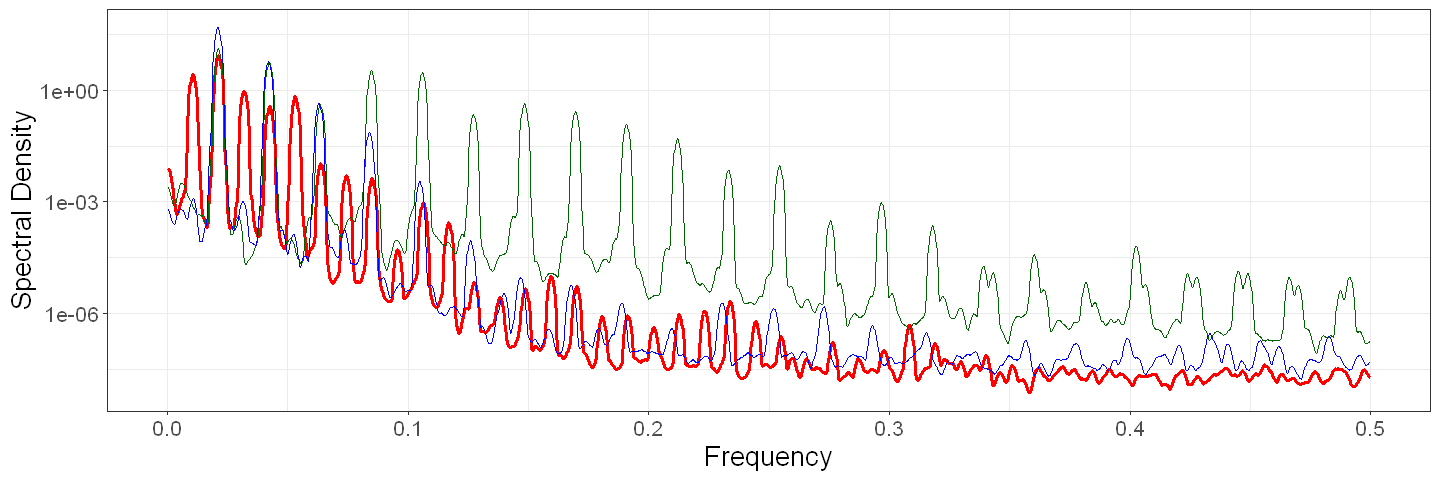

In [15]:
ggplot() +
    geom_line(aes(x=spec_tuba$freq, y=spec_tuba$spec), color='red', size=1) +
    geom_line(aes(x=spec_tbone$freq, y=spec_tbone$spec), color='darkgreen') +
    geom_line(aes(x=spec_euph$freq, y=spec_euph$spec), color='blue') +
    xlab('Frequency') + ylab('Spectral Density') +
    scale_y_continuous(trans="log10") +
    theme_bw() + theme(text = element_text(size=16))

There does seem to be peaks at half of the frequencies, corresponding to the harmonics of the note being played.  Let's once again use the subsampled version of the tuba waveform for comparison, instead:

In [16]:
spec_tuba_subsampled = spec(Y_tuba_subsampled, spans=c(11, 11), taper=.1, plot=F);

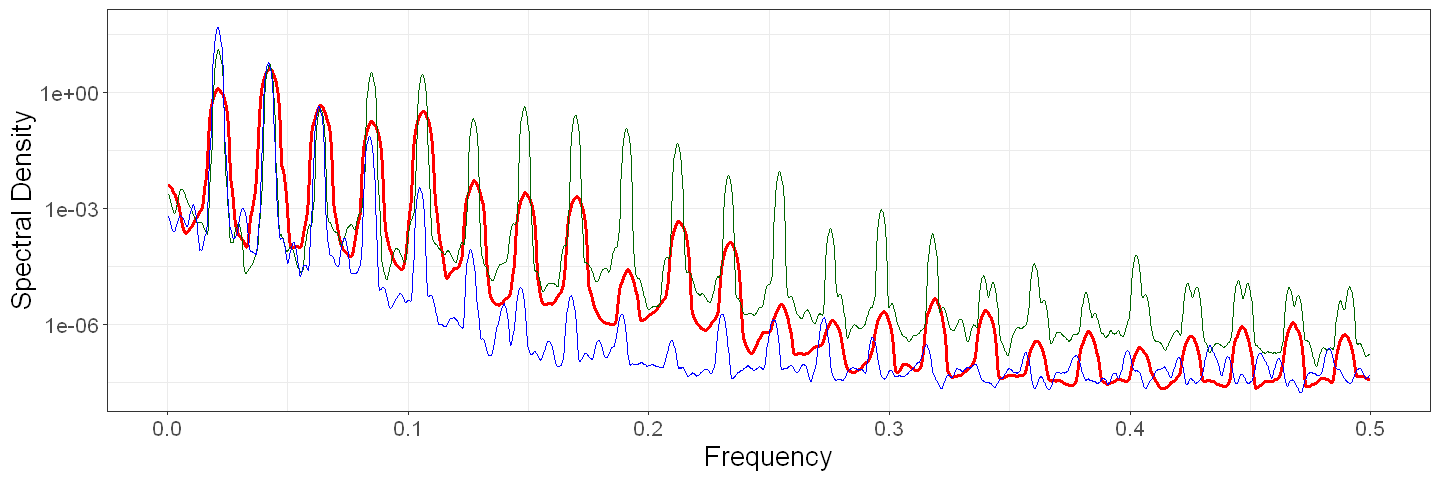

In [17]:
ggplot() +
    geom_line(aes(x=spec_tuba_subsampled$freq, y=spec_tuba_subsampled$spec), color='red', size=1) +
    geom_line(aes(x=spec_tbone$freq, y=spec_tbone$spec), color='darkgreen') +
    geom_line(aes(x=spec_euph$freq, y=spec_euph$spec), color='blue') +
    xlab('Frequency') + ylab('Spectral Density') +
    scale_y_continuous(trans="log10") +
    theme_bw() + theme(text = element_text(size=16))

Peaks are now aligned -- and as expected, the spectral density seems to be somewhere in between that of the trombone (brassier) and the euphonium (less brassy).

**(d)** The red curve is closer to the blue curve than the green curve in the last chart; this is agreement with the euphonium having a name associated with the tuba, tenor tuba.